<a href="https://colab.research.google.com/github/jjomathew98/datasci_3_eda/blob/main/HHA_507_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Packages
### Here we are installing the Pandas Profiling package

In [10]:
pip install pandas_profiling


### Loading pandas and numpy packages

In [11]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

#1. Univariate Analysis:
##1.1 Loading Dataset
###Loading the dataset from Week 2 Dataset file: https://github.com/hantswilliams/HHA_507_2023/blob/main/WK2/data/Hospital_Cost_Report_2019.csv

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/Hospital_Cost_Report_2019.csv')
df

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,700569,52043,1125 SIR FRANCIS DRAKE OPERATING CO,1125 SIR FRANCIS DRAKE BLVD,KENTFIELD,CA,94904-1455,NaN,94904.0,U,...,3885386.0,282333.0,4167719.0,3.0,4167716.0,NaN,NaN,NaN,NaN,NaN
1,698041,421301,ABBEVILLE AREA MEDICAL CENTER,ABBEVILLE AREA MEDICAL CENTER,ABBEVILLE,SC,29620,ABBEVILLE,99942.0,R,...,-6000221.0,5205543.0,-794678.0,2754.0,-797432.0,0.525693,234123.0,7.476990e+05,NaN,NaN
2,709145,190034,ABBEVILLE GENERAL HOSPITAL,118 NORTH HOSPITAL DRIVE,ABBEVILLE,LA,70511-0580,VERMILION,29180.0,R,...,-1897650.0,3694407.0,1796757.0,NaN,1796757.0,0.308672,15429157.0,4.882032e+07,NaN,NaN
3,705454,240057,ABBOTT NORTHWESTERN HOSPITAL,800 EAST 28TH STREET,MINNEAPOLIS,MN,55407,HENNEPIN,33460.0,U,...,-179388418.0,229952218.0,50563800.0,NaN,50563800.0,0.268633,20419284.0,9.645565e+07,NaN,NaN
4,705220,450558,ABILENE REG MED CTR,6250 HWY 83/84,ABILENE,TX,79606,TAYLOR,10180.0,U,...,-7140506.0,10527317.0,3386811.0,NaN,3386811.0,0.100260,7349497.0,9.805427e+07,57736.0,1496447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,713551,61315,YUMA DISTRICT HOSPITAL,1000 WEST 8TH AVENUE,YUMA,CO,80759-,YUMA,99906.0,R,...,-957720.0,1618853.0,661133.0,895300.0,-234167.0,0.632121,1474583.0,4.257378e+06,9078.0,58303.0
6114,707159,30013,YUMA REGIONAL MEDICAL CENTER,2400 S AVENUE A,YUMA,AZ,85364,YUMA,49740.0,U,...,5718850.0,20614885.0,26333735.0,NaN,26333735.0,0.207615,77284918.0,5.216138e+08,NaN,NaN
6115,685609,33034,YUMA REHABILITATION HOSPITAL AN AFF,901 WEST 24TH STREET,YUMA,AZ,85364,YUMA,49740.0,U,...,6975502.0,-24724.0,6950778.0,NaN,6950778.0,NaN,NaN,NaN,NaN,NaN
6116,687770,192041,ZACHARY-AMG SPECIALTY HOSPITAL,4601 MCHUGH RD. BLDG B,ZACHARY,LA,70791,E. BATON ROUGE PARISH,12940.0,U,...,1497891.0,813.0,1498704.0,NaN,1498704.0,NaN,NaN,NaN,NaN,NaN


### Data Intrepretation
#### It appears each row represents each hospitals information respective to the column datasets

In [13]:
df.shape


(6118, 126)

In [14]:
df.columns

Index(['rpt_rec_num', 'Provider CCN', 'Hospital Name', 'Street Address',
       'City', 'State Code', 'Zip Code', 'County', 'Medicare CBSA Number',
       'Rural Versus Urban',
       ...
       'Net Income from Service to Patients', 'Total Other Income',
       'Total Income', 'Total Other Expenses', 'Net Income',
       'Cost To Charge Ratio', 'Net Revenue from Medicaid', 'Medicaid Charges',
       'Net Revenue from Stand-Alone SCHIP', 'Stand-Alone SCHIP Charges'],
      dtype='object', length=126)

In [15]:
df.isnull().sum()

rpt_rec_num                              0
Provider CCN                             0
Hospital Name                            0
Street Address                           4
City                                     0
                                      ... 
Cost To Charge Ratio                  1427
Net Revenue from Medicaid             1602
Medicaid Charges                      1610
Net Revenue from Stand-Alone SCHIP    5129
Stand-Alone SCHIP Charges             5114
Length: 126, dtype: int64

In [16]:
df.dtypes

rpt_rec_num                             int64
Provider CCN                            int64
Hospital Name                          object
Street Address                         object
City                                   object
                                       ...   
Cost To Charge Ratio                  float64
Net Revenue from Medicaid             float64
Medicaid Charges                      float64
Net Revenue from Stand-Alone SCHIP    float64
Stand-Alone SCHIP Charges             float64
Length: 126, dtype: object

In [17]:
df[['Cost To Charge Ratio', 'Net Revenue from Medicaid', 'Medicaid Charges', 'Net Revenue from Stand-Alone SCHIP', 'Stand-Alone SCHIP Charges']].describe()

,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
count,4691.000000,4.516000e+03,4.508000e+03,9.890000e+02,1.004000e+03
mean,1.031930,2.419027e+07,1.464233e+08,7.456442e+05,4.376319e+06
std,33.677305,5.671014e+07,3.157762e+08,2.794916e+06,1.803438e+07
min,0.055417,-1.824483e+06,2.000000e+00,3.400000e+01,9.000000e+01
25%,0.199217,1.930778e+06,8.024058e+06,2.511200e+04,1.226270e+05
50%,0.290734,7.086967e+06,3.861739e+07,8.313800e+04,5.500755e+05
75%,0.473881,2.200277e+07,1.463105e+08,3.260020e+05,2.281775e+06
max,2280.353040,1.202144e+09,5.157195e+09,4.307011e+07,3.284642e+08


## 1.2 Calculating measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR).

In [18]:
mean_value_chargeratio = df['Cost To Charge Ratio'].mean()
median_value_netrevenue = df['Net Revenue from Medicaid'].median()
mode_value_MedicaidCharges = df['Medicaid Charges'].mode().iloc[0]

In [19]:
variance_chargeratio = np.var(df['Cost To Charge Ratio'])
std_deviation_chargeration = np.std(df['Cost To Charge Ratio'])

In [20]:
percentile_25_Net_Revenue_from_standalone_SCHIP = np.percentile(df['Net Revenue from Stand-Alone SCHIP'], 25)
percentile_75_Net_Revenue_from_standalone_SCHIP = np.percentile(df['Net Revenue from Stand-Alone SCHIP'], 75)

In [21]:
df_range_Stand_Alone_SCHIP_Charges = df['Stand-Alone SCHIP Charges'].max() - df['Stand-Alone SCHIP Charges'].min()

In [22]:
correlation_matrix_1 = df[['Cost To Charge Ratio', 'Net Revenue from Medicaid', 'Medicaid Charges']].corr()
covariance_matrix_2 = df[['Net Revenue from Stand-Alone SCHIP', 'Stand-Alone SCHIP Charges']].cov()

### Results

In [23]:
print("Mean Cost To Charge Ratio:", mean_value_chargeratio)
print("Median Net Revenue from Medicaid:", median_value_netrevenue)
print("Mode Medicaid Charges:", mode_value_MedicaidCharges)
print("Cost To Charge Ratio:", variance_chargeratio)
print("Standard Deviation Cost To Charge Ratio:", std_deviation_chargeration)
print("25th Percentile Net Revenue from Stand-Alone SCHIP:", percentile_25_Net_Revenue_from_standalone_SCHIP)
print("75th Percentile Net Revenue from Stand-Alone SCHIP:", percentile_75_Net_Revenue_from_standalone_SCHIP)
print("Data Range (Stand-Alone SCHIP Charges):", df_range_Stand_Alone_SCHIP_Charges)
print("Correlation Matrix 1:\n", correlation_matrix_1)
print("Covariance Matrix 2:\n", covariance_matrix_2)

Mean Cost To Charge Ratio: 1.031929805371989
Median Net Revenue from Medicaid: 7086967.0
Mode Medicaid Charges: 1034208.0
Cost To Charge Ratio: 1133.9190893943135
Standard Deviation Cost To Charge Ratio: 33.6737151112602
25th Percentile Net Revenue from Stand-Alone SCHIP: nan
75th Percentile Net Revenue from Stand-Alone SCHIP: nan
Data Range (Stand-Alone SCHIP Charges): 328464138.0
Correlation Matrix 1:
                            Cost To Charge Ratio  Net Revenue from Medicaid  \
Cost To Charge Ratio                   1.000000                  -0.041283   
Net Revenue from Medicaid             -0.041283                   1.000000   
Medicaid Charges                      -0.070252                   0.820037   

                           Medicaid Charges  
Cost To Charge Ratio              -0.070252  
Net Revenue from Medicaid          0.820037  
Medicaid Charges                   1.000000  
Covariance Matrix 2:
                                     Net Revenue from Stand-Alone SCHIP  \

## 1.3 Visualization of the distribution of select numerical variables using histograms
### Loading package
#### Installing matplotlib to visualize the distribution of select numerical variables using histograms

In [25]:
pip install matplotlib

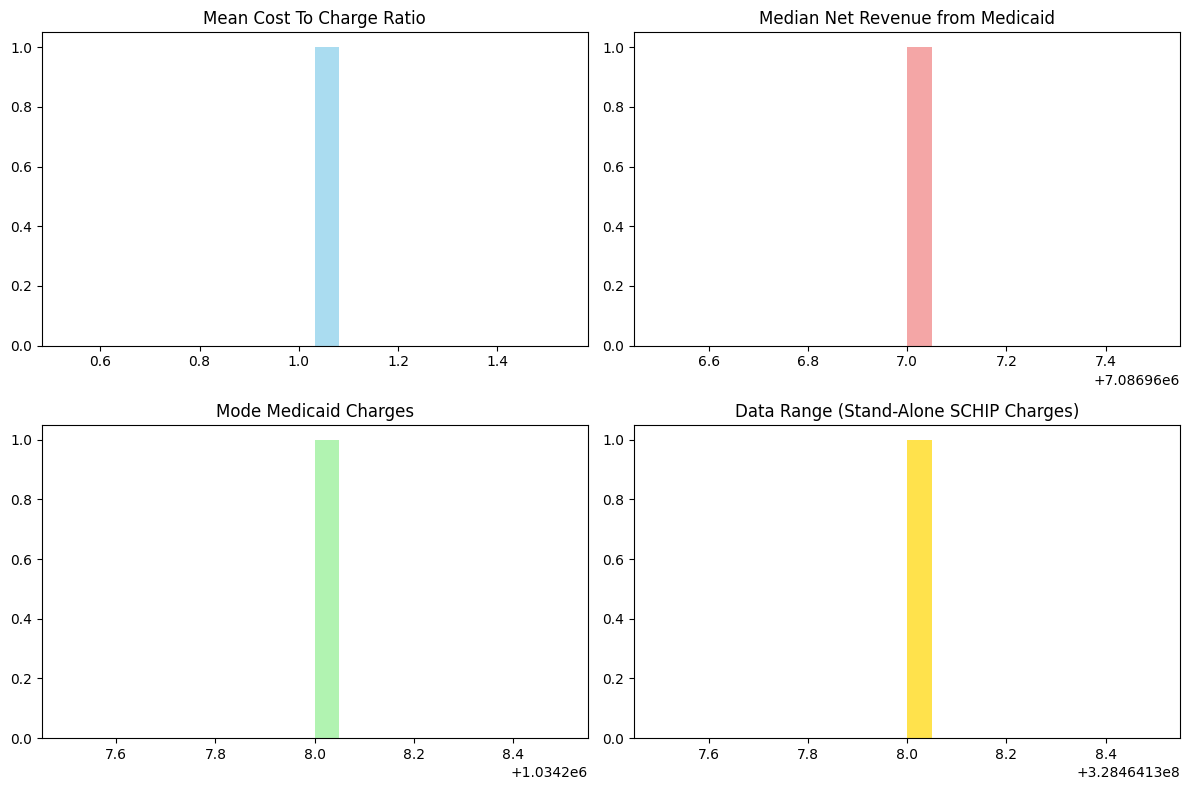

In [26]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
mean_cost_to_charge_ratio = 1.031929805371989
median_net_revenue_medicaid = 7086967.0
mode_medicaid_charges = 1034208.0
cost_to_charge_ratio = 1133.9190893943135
std_dev_cost_to_charge_ratio = 33.6737151112602
data_range_schip_charges = 328464138.0

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms
axes[0, 0].hist(mean_cost_to_charge_ratio, bins=20, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Mean Cost To Charge Ratio')

axes[0, 1].hist(median_net_revenue_medicaid, bins=20, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Median Net Revenue from Medicaid')

axes[1, 0].hist(mode_medicaid_charges, bins=20, color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Mode Medicaid Charges')

axes[1, 1].hist(data_range_schip_charges, bins=20, color='gold', alpha=0.7)
axes[1, 1].set_title('Data Range (Stand-Alone SCHIP Charges)')

# Add labels and adjust spacing
plt.tight_layout()
plt.show()




#2. Bivariate Analysis:
## 2.1 Analyze the relationship between pairs of variable
#### Using scatter plots to explore potential relationships between two numerical variables.

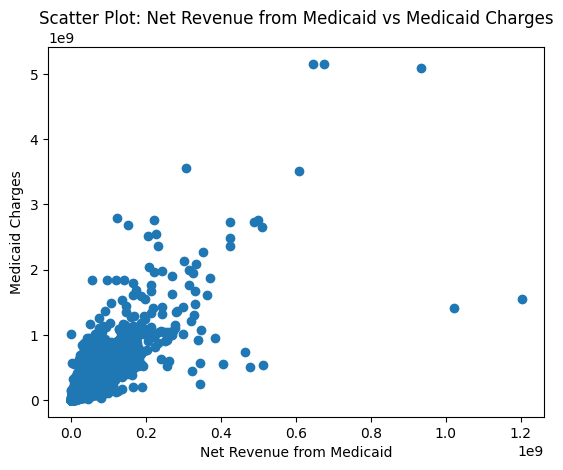

In [27]:

# Specify the actual column names you want to use for the scatter plot
x_variable = 'Net Revenue from Medicaid'
y_variable = 'Medicaid Charges'

# Create a scatter plot
plt.scatter(df[x_variable], df[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Scatter Plot: {x_variable} vs {y_variable}')
plt.show()


## 2.2 Computing correlation coefficients for numerical variables

In [28]:
correlation_coefficient = df[x_variable].corr(df[y_variable])
print(f'Correlation coefficient between {x_variable} and {y_variable}: {correlation_coefficient}')

Correlation coefficient between Net Revenue from Medicaid and Medicaid Charges: 0.8200365888482817


#3. Handling Outliers:

In [29]:
column_to_analyze = 'Net Revenue from Medicaid'

# Calculate the IQR
Q1 = df[column_to_analyze].quantile(0.25)
Q3 = df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_to_analyze] < lower_bound) | (df[column_to_analyze] > upper_bound)]

# Decide on an approach to handle outliers
# For example, you can choose to remove them or replace them with the median
# Let's remove outliers in this example
df_cleaned = df[(df[column_to_analyze] >= lower_bound) & (df[column_to_analyze] <= upper_bound)]

# Justify your decision in a markdown cell
# For instance, removing outliers can improve the reliability of statistical analyses,
# especially when the outliers are due to data entry errors or other anomalies.

# Check if there are no outliers based on z-scores >= 1
z_scores = (df[column_to_analyze] - df[column_to_analyze].mean()) / df[column_to_analyze].std()
no_outliers = df[abs(z_scores) < 1]

# Print the results
print("Outliers:")
print(outliers)
print("\nDataFrame after removing outliers:")
print(df_cleaned)
print("\nDataFrame with no outliers based on z-scores:")
print(no_outliers)


Outliers:
      rpt_rec_num  Provider CCN                     Hospital Name  \
52         708763        100007              ADVENTHEALTH ORLANDO   
64         712796         50455      ADVENTIST HEALTH BAKERSFIELD   
67         716699         50239         ADVENTIST HEALTH GLENDALE   
68         708961         50121          ADVENTIST HEALTH HANFORD   
70         714683         50192          ADVENTIST HEALTH REEDLEY   
...           ...           ...                               ...   
6102       708090        500036   YAKIMA VALLEY MEMORIAL HOSPITAL   
6103       705546         70022           YALE-NEW HAVEN HOSPITAL   
6111       708052        390046                     YORK HOSPITAL   
6114       707159         30013      YUMA REGIONAL MEDICAL CENTER   
6117       708981         50228  ZUCKERBERG SAN FRANCISCO GENERAL   

                Street Address           City State Code    Zip Code  \
52        601 EAST ROLLINS ST.        ORLANDO         FL       32803   
64         2615 C

#4. Automated Analysis:
## Using the automated EDA tool pandas profiling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/Hospital_Cost_Report_2019.csv')
report = ProfileReport (df)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]